In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### task 1

Координата первого объекта относительно первой главной компоненты: -7.152
Координата первого объекта относительно второй главной компоненты: 29.259
Доля объясненной дисперсии: 0.697
Минимальное количество главных компонент, чтобы доля объясненной дисперсии превышала 0.853


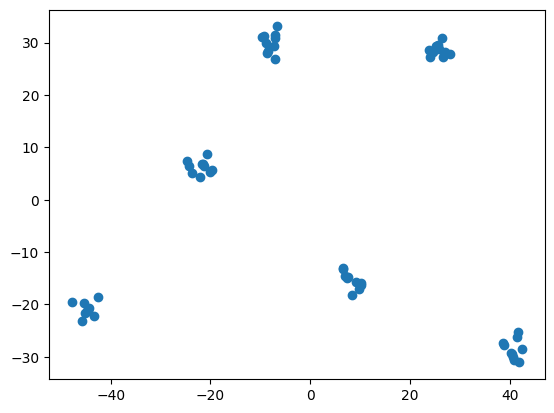

In [5]:
# Чтение данных
df = pd.read_csv("./data/66_36.csv", header=None,
                 names=[f'feature_{i}' for i in range(10)])

pca = PCA(n_components=10)
pca.fit(df)
transformed_data = pca.transform(df)
explained_variance = pca.explained_variance_ratio_

print(f"Координата первого объекта относительно первой главной компоненты: {transformed_data[0, 0]:.3f}")
print(f"Координата первого объекта относительно второй главной компоненты: {transformed_data[0, 1]:.3f}")
print(f"Доля объясненной дисперсии: {(explained_variance[0] + explained_variance[1]):.3f}")

cumulative_variance = np.cumsum(explained_variance)
min_components = np.argmax(cumulative_variance > 0.85) + 1
print(f"Минимальное количество главных компонент, чтобы доля объясненной дисперсии превышала 0.85{min_components}")

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.show()

### task 2

Text(0.5, 1.0, 'Изображение в градациях серого')

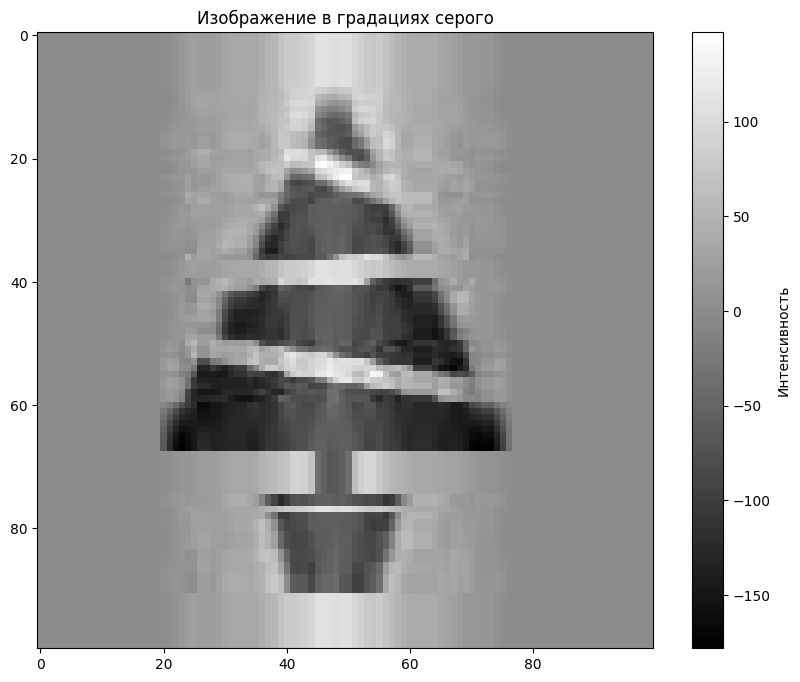

In [6]:
loadings_df = pd.read_csv("./data/X_loadings_428.csv",
                          sep=';',
                          header=None,
                          names=[f'feature_{i}' for i in range(10)])

scores_df = pd.read_csv("./data/X_reduced_428.csv", 
                        sep=';',header=None,
                        names=[f'feature_{i}' for i in range(10)])


scores_matrix = scores_df.values
loadings_matrix = loadings_df.values

x = scores_matrix @ loadings_matrix.T

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(x, cmap='gray')
plt.colorbar(label='Интенсивность')
plt.title('Изображение в градациях серого')